# ML homework 3 - 多类分类和神经网络

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [61]:
data = loadmat(r'.\data\ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [64]:
def plot_100_num():
    sample_idx = np.random.choice(5000, size=100, replace=False)
    sample_img = data['X'][sample_idx, :]
    fig, ax = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(8, 8))
    
    for r in range(10):
        for c in range(10):            
            ax[r, c].matshow(sample_img[(r-1)*10+c].reshape((20, 20)), cmap=matplotlib.cm.binary)
            plt.xticks([])
            plt.yticks([])
    plt.show()

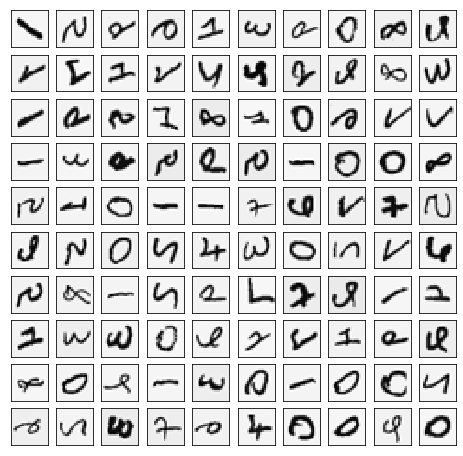

In [65]:
plot_100_num()

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [17]:
def cost(theta, x, y):
    return np.mean(-y * np.log(sigmoid(x@theta)) - (1-y)*np.log(1-sigmoid(x@theta)))

In [18]:
def gradient(theta, x, y):
    return (1/len(x))* x.T @ (sigmoid(x@theta) - y)

In [19]:
def regularized_cost(theta, x, y, l=1):
    t = theta[1:]
    reg = (l / (2*len(x))) * np.power(t, 2).sum()
    return cost(theta, x, y) + reg

In [20]:
def regularized_gradient(theta, x, y, l=1):
    t = theta[1:]
    t_reg = (l/len(x)) * t
    t_reg = np.concatenate([np.zeros(1), t_reg])
    return gradient(theta, x, y) + t_reg

# one-vs-all分类

## 训练模型

In [21]:
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [40]:
x = np.insert(data['X'], 0, values=np.ones(data['X'].shape[0]), axis=1)

# 向量化y，只需要训练一次，不需要循环训练
y = np.zeros((10, 5000))
y[0, :] = (data['y']==10).astype(int).reshape(data['y'].shape[0])
for i in range(1, 10):
    y[i, :] = (data['y']==i).astype(int).reshape(data['y'].shape[0])

print(x.shape)
print(y.shape)
print(all_theta.shape)

(5000, 401)
(10, 5000)
(10, 401)


In [39]:
y

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [46]:
def train(x, y, l=1):
    theta = np.zeros(x.shape[1])
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(x, y, l), method='Newton-CG', jac=regularized_gradient)
    return res.x

In [42]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [47]:
t0 = train(x, y[0])
print(t0.shape)
y_pred = predict(x, t0)
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

(401,)
Accuracy=0.9974


In [48]:
all_theta = np.array([train(x, y[i]) for i in range(10)])
print(all_theta.shape)

(10, 401)


In [49]:
y_pred = np.argmax(sigmoid(x@all_theta.T), axis=1)
print(y_pred)

[0 0 0 ... 9 9 7]


In [53]:
y_ans = data['y'].copy()
y_ans[y_ans==10] = 0
print(y_ans)

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


In [54]:
print(classification_report(y_ans, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



# 神经网络模型

In [66]:
weights = loadmat(r'.\data\ex3weights.mat')
print(weights['Theta1'].shape)
print(weights['Theta2'].shape)

(25, 401)
(10, 26)


In [63]:
x = data['X'].copy()
x = np.insert(x, 0, values=np.ones(x.shape[0]), axis=1)  # intercept

y = data['y'].copy()

print(x.shape)
print(y.shape)

(5000, 401)
(5000, 1)


In [72]:
a1 = x
z2 = sigmoid(x@weights['Theta1'].T)
a2 = np.insert(z2, 0, np.ones(z2.shape[0]), axis=1)
print(a2.shape)

(5000, 26)


In [74]:
a3 = sigmoid(a2@weights['Theta2'].T)
print(a3.shape)

(5000, 10)


In [79]:
y_pred = np.argmax(a3, axis=1) + 1 # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
print(y_pred.shape)
print(y_pred)

(5000,)
[10 10 10 ...  9  9  9]


In [76]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

